# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 59.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
df_data = pd.read_csv('past_launches1.csv')

In [6]:
df_data.shape

(7038, 7)

In [7]:
df_data.columns

Index(['Organization', 'Location', 'Date', 'Details', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [8]:
df_data.isna().values.any()

np.True_

In [9]:
df_data.duplicated().values.any()

np.True_

In [10]:
duplicate = df_data[df_data.duplicated()]
duplicate

,Organization,Location,Date,Details,Rocket_Status,Price,Mission_Status
1642,Virgin Galactic,"VMS Eve, Mojave Air and Space Port, California...",NaN,SpaceShipTwo | PF03,Retired,NaN,Success
1679,Virgin Galactic,"VMS Eve, Mojave Air and Space Port, California...",NaN,SpaceShipTwo | PF02,Retired,NaN,Success
1778,ISA,"Safir Launch Pad, Semnan Space Center, Iran",NaN,Safir-1B+ | Fajr,Active,NaN,Failure
3335,IAI,"Pad 1, Palmachim Airbase, Israel",NaN,Shavit | Ofek,Retired,NaN,Failure


In [11]:
df_data.head()

,Organization,Location,Date,Details,Rocket_Status,Price,Mission_Status
0,Blue Origin,"Launch Site One, West Texas, Texas, USA","Mon Apr 14, 2025 19:00 GMT+5:30",New Shepard | NS-31,Active,NaN,Success
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Mon Apr 14, 2025 09:30 GMT+5:30",Falcon 9 Block 5 | Starlink Group 6-73,Active,69.75,Success
2,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 13, 2025 06:23 GMT+5:30",Falcon 9 Block 5 | Starlink Group 12-17,Active,69.75,Success
3,SpaceX,"SLC-4E, Vandenberg SFB, California, USA","Sat Apr 12, 2025 17:55 GMT+5:30",Falcon 9 Block 5 | NROL-192,Active,69.75,Success
4,CASC,"LC-3, Xichang Satellite Launch Center, China","Thu Apr 10, 2025 22:17 GMT+5:30",Long March 3B/E | TJSW-17,Active,29.15,Success


In [12]:
df_data.tail()

,Organization,Location,Date,Details,Rocket_Status,Price,Mission_Status
7033,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Wed Feb 5, 1958 13:03 GMT+5:30",Vanguard | Vanguard TV3BU,Retired,NaN,Failure
7034,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA","Sat Feb 1, 1958 09:17 GMT+5:30",Juno I | Explorer 1,Retired,NaN,Success
7035,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Fri Dec 6, 1957 22:14 GMT+5:30",Vanguard | Vanguard TV3,Retired,NaN,Failure
7036,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 3, 1957 08:00 GMT+5:30",Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success
7037,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sat Oct 5, 1957 00:58 GMT+5:30",Sputnik 8K71PS | Sputnik 1,Retired,NaN,Success


In [13]:
df_data[df_data.Organization == 'RVSN USSR'].count()

,0
Organization,2476
Location,2476
Date,2464
Details,2476
Rocket_Status,2476
Price,659
Mission_Status,2476


## Descriptive Statistics

In [14]:
df_data.describe()

,Organization,Location,Date,Details,Rocket_Status,Price,Mission_Status
count,7038,7038,6998,7038,7038,2927,7038
unique,71,175,6997,6995,2,71,4
top,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Wed Feb 6, 2019 02:31 GMT+5:30",Soyuz U | Resurs-F,Retired,20.0,Success
freq,2476,487,2,20,5423,807,6448


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organization    7038 non-null   object
 1   Location        7038 non-null   object
 2   Date            6998 non-null   object
 3   Details         7038 non-null   object
 4   Rocket_Status   7038 non-null   object
 5   Price           2927 non-null   object
 6   Mission_Status  7038 non-null   object
dtypes: object(7)
memory usage: 385.0+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [16]:
data = df_data.groupby('Organization')['Mission_Status'].count().sort_values(ascending=False)

In [17]:
data = data.head(10)

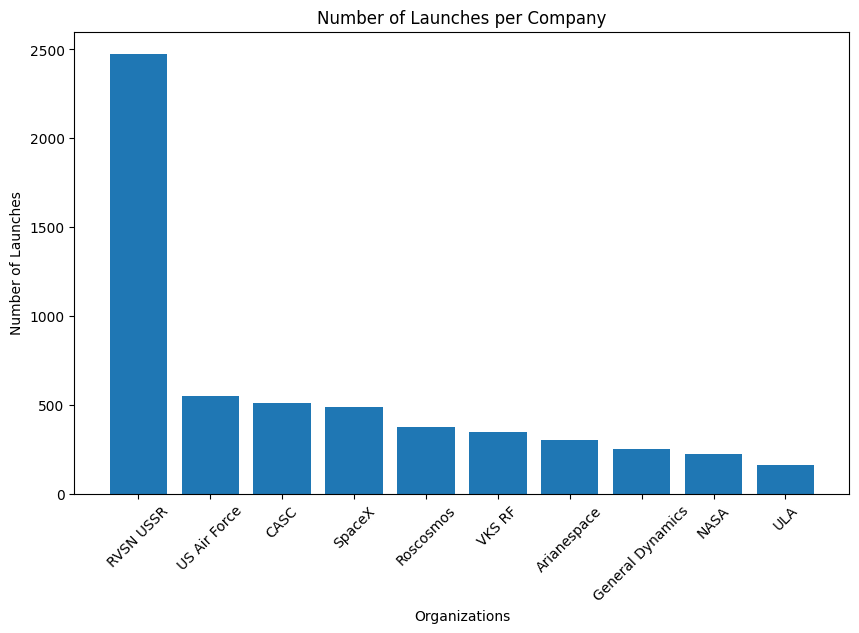

In [18]:
plt.figure(figsize=(10,6))
plt.bar(x=data.index,
        height=data.values)
plt.title('Number of Launches per Company')
plt.xlabel('Organizations')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()



# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [19]:
status_rockets = df_data.Rocket_Status.value_counts()
status_rockets

,count
Rocket_Status,
Retired,5423
Active,1615


In [20]:
print(f"Active Rockets: {status_rockets.get('Active',0)}")
print(f"Retired Rockets: {status_rockets.get('Retired',0)}")

Active Rockets: 1615
Retired Rockets: 5423


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [21]:
status_mission = df_data.Mission_Status.value_counts()
status_mission

,count
Mission_Status,
Success,6448
Failure,465
Partial Failure,116
Prelaunch Failure,9


In [22]:
print(f"Successful Mission: {status_mission.get('Success',0)}")
print(f"Failed Mission: {status_mission.get('Failure',0) + status_mission.get('Partial Failure',0) + status_mission.get('Prelaunch Failure',0)}")

Successful Mission: 6448
Failed Mission: 590


In [23]:
print(f"% of successful Missions: {round((6448/(6448 + 590))*100,2)}%")
print(f"% of failed Missions:{round((100 - 91.62),2)}%")
print(f"Partial and Prelaunch Failure combined accounts for {round(((116 + 9)/(6448 + 590))*100,2)}% of the total launches.")

% of successful Missions: 91.62%
% of failed Missions:8.38%
Partial and Prelaunch Failure combined accounts for 1.78% of the total launches.


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [24]:
df_data['Price'] = df_data['Price'].astype(str).str.replace(',','')
df_data['Price'] = pd.to_numeric(df_data['Price'],errors='coerce')


In [25]:
new_prices = df_data['Price'].dropna()
filtered_prices = new_prices[new_prices < 500]


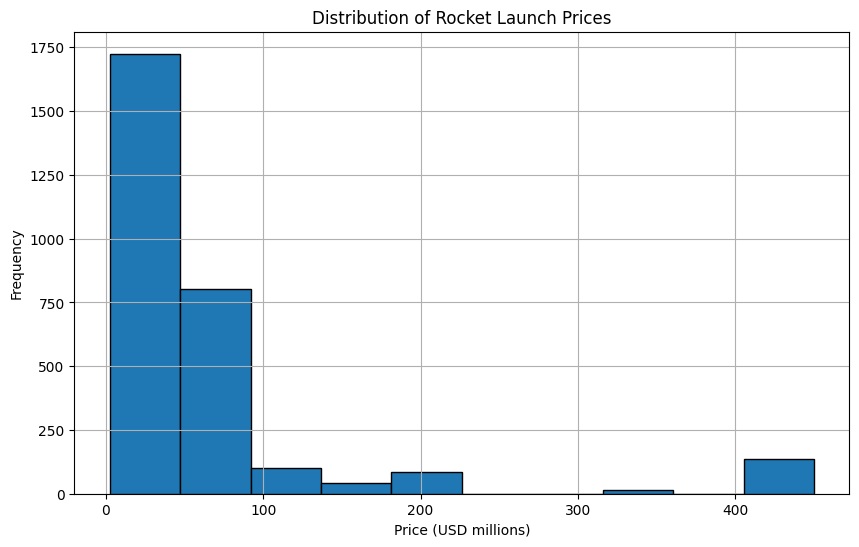

In [26]:
plt.figure(figsize=(10,6))
plt.hist(filtered_prices,bins=10,edgecolor='black')
plt.title('Distribution of Rocket Launch Prices')
plt.xlabel('Price (USD millions)')
plt.ylabel('Frequency')
plt.grid(True)

# Use a Choropleth Map to Show the Number of Launches by Country

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA



In [27]:
country = df_data['Location'].str.split(',').str[-1].str.strip()
new_countries={
    'Russia': 'Russian Federation',
    'New Mexico':'USA',
    'Yellow Sea':'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility':'USA',
    'Barents Sea': ' Russian Federation',
    'Gran Canaria':'USA'
}
country.replace(new_countries,inplace=True)

In [28]:
def get_alpha3(country_name):
    try:
        return countries.get(country_name).alpha3
    except KeyError:
        return 'UNK'

df_data['Country Code'] = country.apply(get_alpha3)

In [29]:
df_data.head(5)

,Organization,Location,Date,Details,Rocket_Status,Price,Mission_Status,Country Code
0,Blue Origin,"Launch Site One, West Texas, Texas, USA","Mon Apr 14, 2025 19:00 GMT+5:30",New Shepard | NS-31,Active,NaN,Success,USA
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Mon Apr 14, 2025 09:30 GMT+5:30",Falcon 9 Block 5 | Starlink Group 6-73,Active,69.75,Success,USA
2,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 13, 2025 06:23 GMT+5:30",Falcon 9 Block 5 | Starlink Group 12-17,Active,69.75,Success,USA
3,SpaceX,"SLC-4E, Vandenberg SFB, California, USA","Sat Apr 12, 2025 17:55 GMT+5:30",Falcon 9 Block 5 | NROL-192,Active,69.75,Success,USA
4,CASC,"LC-3, Xichang Satellite Launch Center, China","Thu Apr 10, 2025 22:17 GMT+5:30",Long March 3B/E | TJSW-17,Active,29.15,Success,CHN


In [30]:
launches_by_country = df_data.groupby('Country Code').size().reset_index(name='Launches')
launches_by_country.head(17)

,Country Code,Launches
0,AUS,6
1,BRA,3
2,CHN,649
3,FRA,328
4,IND,97
5,ISR,14
6,JPN,139
7,KAZ,1563
8,KEN,9
9,MHL,9


In [31]:
fig = px.choropleth(launches_by_country, locations="Country Code",
                    color="Launches", # lifeExp is a column of gapminder
                    hover_name="Country Code", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [32]:
num_fails = df_data[df_data['Mission_Status']== 'Failure']
num_fails = num_fails.groupby('Country Code').count().reset_index()
num_fails

,Country Code,Organization,Location,Date,Details,Rocket_Status,Price,Mission_Status
0,AUS,4,4,4,4,4,0,4
1,BRA,2,2,2,2,2,0,2
2,CHN,30,30,29,30,30,9,30
3,FRA,15,15,15,15,15,3,15
4,IND,10,10,10,10,10,6,10
5,ISR,4,4,2,4,4,0,4
6,JPN,15,15,15,15,15,4,15
7,KAZ,113,113,113,113,113,20,113
8,MHL,3,3,3,3,3,3,3
9,NOR,1,1,1,1,1,0,1


In [33]:
fig = px.choropleth(num_fails, locations="Country Code",
                    color="Mission_Status", # lifeExp is a column of gapminder
                    hover_name="Country Code", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [34]:
px.sunburst(
    df_data,
    path=['Country Code','Organization','Mission_Status']
)


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [35]:
money_spent_org=df_data.groupby('Organization')['Price'].sum().sort_values(ascending=False).head(10)

In [36]:
money_spent_org

,Price
Organization,
NASA,"77,156.00"
SpaceX,"32,720.00"
RVSN USSR,"20,200.00"
Arianespace,"19,045.00"
ULA,"18,386.00"
CASC,"16,451.78"
Roscosmos,"6,967.06"
ILS,"5,610.00"
Northrop,"4,520.00"


# Analyse the Amount of Money Spent by Organisation per Launch

In [37]:
money_spent_org_per_launch=df_data.groupby('Organization')['Price'].mean().sort_values(ascending=False).head(10)

In [38]:
money_spent_org_per_launch

,Price
Organization,
NASA,514.37
Boeing,177.29
ULA,157.15
Arianespace,140.04
MHI,90.05
Martin Marietta,80.16
ILS,71.01
SpaceX,68.60
ESA,62.50


# Chart the Number of Launches per Year

In [39]:
df_data['Date']

,Date
0,"Mon Apr 14, 2025 19:00 GMT+5:30"
1,"Mon Apr 14, 2025 09:30 GMT+5:30"
2,"Sun Apr 13, 2025 06:23 GMT+5:30"
3,"Sat Apr 12, 2025 17:55 GMT+5:30"
4,"Thu Apr 10, 2025 22:17 GMT+5:30"
...,...
7033,"Wed Feb 5, 1958 13:03 GMT+5:30"
7034,"Sat Feb 1, 1958 09:17 GMT+5:30"
7035,"Fri Dec 6, 1957 22:14 GMT+5:30"
7036,"Sun Nov 3, 1957 08:00 GMT+5:30"


In [40]:

df_data['Date'] = pd.to_datetime(df_data['Date'],errors='coerce')

<ipython-input-40-4851132ecc23>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [41]:
print(df_data['Date'].dtype)

datetime64[ns, UTC-05:30]


In [42]:
df_data = df_data.set_index('Date')
yearly_launches = df_data['Mission_Status'].resample('Y').count()

<ipython-input-42-24c9ce5b2336>:2: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



In [43]:
yearly_launches

,Mission_Status
Date,
1957-12-31 00:00:00-05:30,3
1958-12-31 00:00:00-05:30,22
1959-12-31 00:00:00-05:30,24
1960-12-31 00:00:00-05:30,41
1961-12-31 00:00:00-05:30,56
...,...
2021-12-31 00:00:00-05:30,156
2022-12-31 00:00:00-05:30,190
2023-12-31 00:00:00-05:30,231


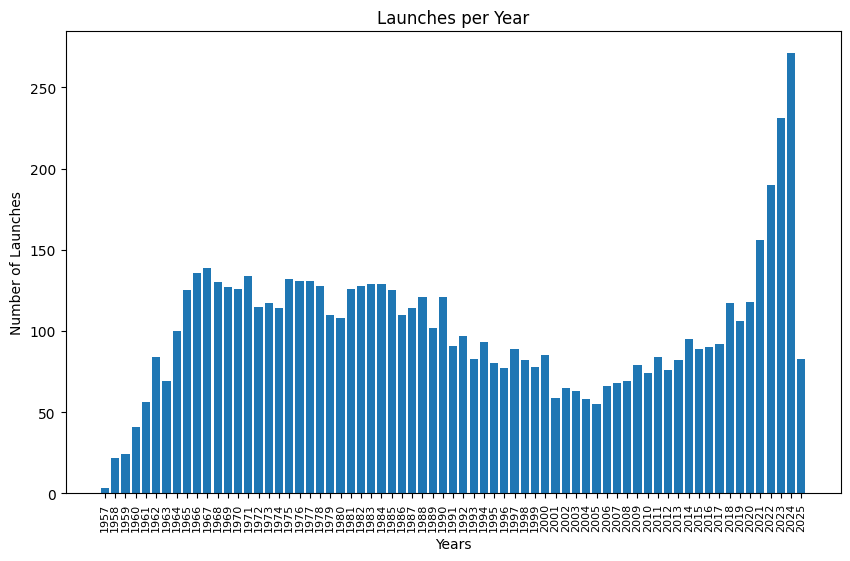

In [44]:
plt.figure(figsize=(10,6))
plt.bar(yearly_launches.index.year,
        yearly_launches.values)
plt.title('Launches per Year')
plt.xlabel('Years')
plt.ylabel('Number of Launches')
plt.xticks(yearly_launches.index.year, rotation=90, fontsize=8)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

<ipython-input-45-182c829c3f47>:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



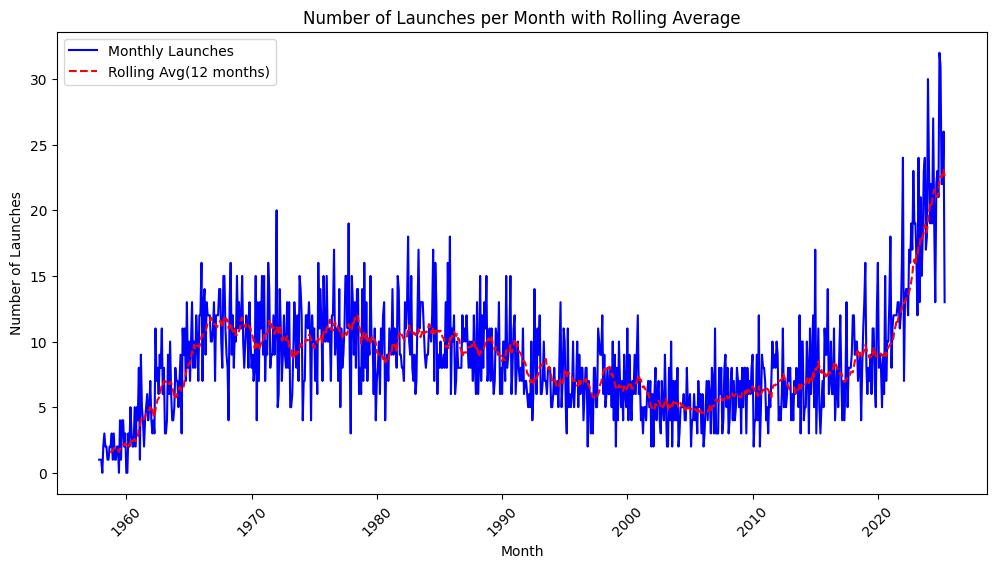

In [45]:
launches_per_month = df_data['Mission_Status'].resample('M').count()
rolling_df = launches_per_month.rolling(window=12).mean()
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(launches_per_month.index, launches_per_month.values, label="Monthly Launches", color='blue')
ax.plot(launches_per_month.index, rolling_df.values, label='Rolling Avg(12 months)', color='red', linestyle='--')
ax.set_title('Number of Launches per Month with Rolling Average')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Launches')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [46]:
peak_month = launches_per_month.idxmax()
peak_count = launches_per_month.max()
print(f"The month with the highest number of launches is {peak_month.strftime('%B %Y')} with {peak_count} launches.")

The month with the highest number of launches is November 2024 with 32 launches.


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [47]:
months = df_data.index.month_name()

In [48]:
month_counts = months.value_counts()
month_counts
popular_month = month_counts.idxmax()
unpopular_month = month_counts.idxmin()
print(f"Most popular month is {popular_month} with count {month_counts.max()}")
print(f"Least popular month is {unpopular_month} with count {month_counts.min()}")

Most popular month is December with count 748
Least popular month is January with count 434


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [49]:
launch_price = df_data['Price'].resample('Y').mean()
launch_price

<ipython-input-49-7dba72bb3f9c>:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



,Price
Date,
1957-12-31 00:00:00-05:30,NaN
1958-12-31 00:00:00-05:30,NaN
1959-12-31 00:00:00-05:30,NaN
1960-12-31 00:00:00-05:30,NaN
1961-12-31 00:00:00-05:30,NaN
...,...
2021-12-31 00:00:00-05:30,50.86
2022-12-31 00:00:00-05:30,58.08
2023-12-31 00:00:00-05:30,53.53


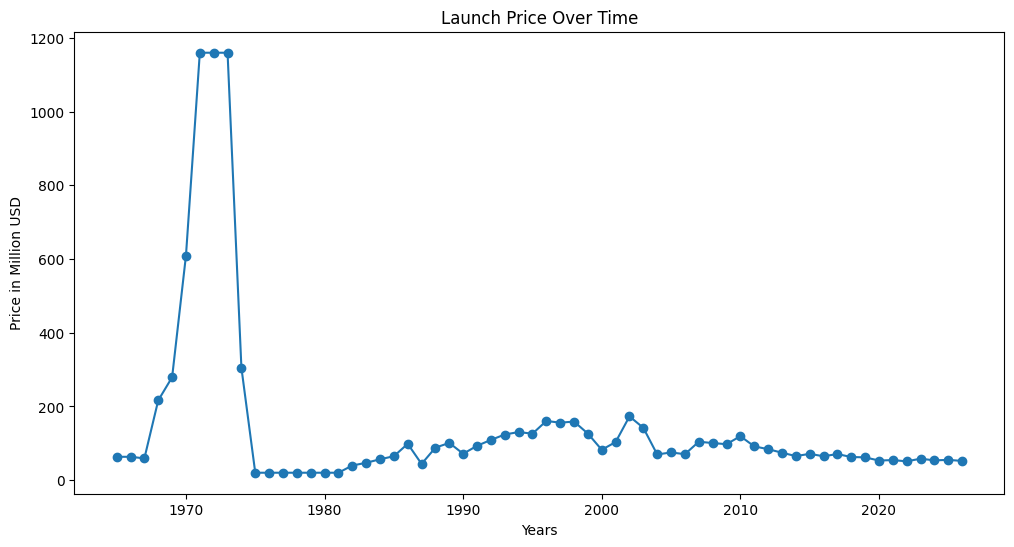

In [50]:
plt.figure(figsize=(12,6))
plt.plot(launch_price.index,
         launch_price.values, marker='o')
plt.title('Launch Price Over Time')
plt.xlabel('Years')
plt.ylabel('Price in Million USD')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [51]:
df_data = df_data.reset_index()
print(df_data.columns)

Index(['Date', 'Organization', 'Location', 'Details', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country Code'],
      dtype='object')


In [52]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data = df_data.set_index('Date')
top_10_orgs = df_data['Organization'].value_counts().head(10).index
top_10_orgs

Index(['RVSN USSR', 'US Air Force', 'CASC', 'SpaceX', 'Roscosmos', 'VKS RF',
       'Arianespace', 'General Dynamics', 'NASA', 'ULA'],
      dtype='object', name='Organization')

In [53]:
df_top_orgs = df_data[df_data['Organization'].isin(top_10_orgs)]
df_top_orgs


,Organization,Location,Details,Rocket_Status,Price,Mission_Status,Country Code
Date,,,,,,,
2025-04-14 09:30:00-05:30,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",Falcon 9 Block 5 | Starlink Group 6-73,Active,69.75,Success,USA
2025-04-13 06:23:00-05:30,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink Group 12-17,Active,69.75,Success,USA
2025-04-12 17:55:00-05:30,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",Falcon 9 Block 5 | NROL-192,Active,69.75,Success,USA
2025-04-10 22:17:00-05:30,CASC,"LC-3, Xichang Satellite Launch Center, China",Long March 3B/E | TJSW-17,Active,29.15,Success,CHN
2025-04-08 11:17:00-05:30,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Soyuz 2.1a | Soyuz MS-27,Active,17.42,Success,KAZ
...,...,...,...,...,...,...,...
1958-08-17 17:48:00-05:30,US Air Force,"SLC-17A, Cape Canaveral SFS, Florida, USA",Thor DM-18 Able-I | Pioneer 0,Retired,NaN,Failure,USA
1958-05-15 12:30:00-05:30,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8A91 | Sputnik 3,Retired,NaN,Success,KAZ
1958-04-27 14:31:00-05:30,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8A91 | D-1 n°01,Retired,NaN,Failure,KAZ


In [54]:
launch_org_year = df_top_orgs.groupby([df_top_orgs.index.year,'Organization'])['Mission_Status'].count().unstack().fillna(0)

<Figure size 1400x700 with 0 Axes>

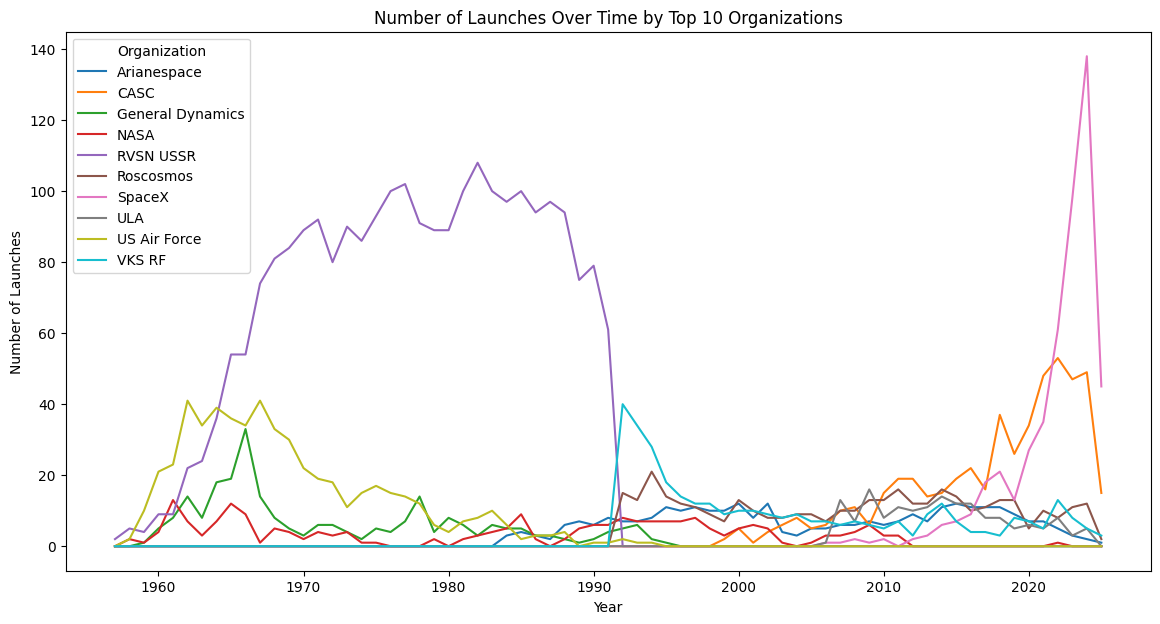

In [55]:

plt.figure(figsize=(14, 7))
launch_org_year.plot(kind='line', figsize=(14, 7))

plt.title('Number of Launches Over Time by Top 10 Organizations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organization', loc='upper left')
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [67]:
df_data=df_data.reset_index()

In [68]:
df_data.columns

Index(['Date', 'Organization', 'Location', 'Details', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country Code'],
      dtype='object')

,Date,Organization,Location,Details,Rocket_Status,Price,Mission_Status,Country Code
0,2025-04-14 19:00:00-05:30,Blue Origin,"Launch Site One, West Texas, Texas, USA",New Shepard | NS-31,Active,NaN,Success,USA
1,2025-04-14 09:30:00-05:30,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",Falcon 9 Block 5 | Starlink Group 6-73,Active,69.75,Success,USA
2,2025-04-13 06:23:00-05:30,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink Group 12-17,Active,69.75,Success,USA
3,2025-04-12 17:55:00-05:30,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",Falcon 9 Block 5 | NROL-192,Active,69.75,Success,USA
4,2025-04-10 22:17:00-05:30,CASC,"LC-3, Xichang Satellite Launch Center, China",Long March 3B/E | TJSW-17,Active,29.15,Success,CHN
...,...,...,...,...,...,...,...,...
7033,1958-02-05 13:03:00-05:30,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",Vanguard | Vanguard TV3BU,Retired,NaN,Failure,USA
7034,1958-02-01 09:17:00-05:30,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",Juno I | Explorer 1,Retired,NaN,Success,USA
7035,1957-12-06 22:14:00-05:30,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",Vanguard | Vanguard TV3,Retired,NaN,Failure,USA
7036,1957-11-03 08:00:00-05:30,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success,KAZ


In [71]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

In [72]:
cold_war= df_data[df_data['Date'].dt.year<= 1991]

In [73]:
df_data.columns

Index(['Date', 'Organization', 'Location', 'Details', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country Code'],
      dtype='object')

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [74]:
country_needed = ['USA', 'RUS', 'KAZ']
launch_data = cold_war[cold_war['Country Code'].isin(country_needed)]
launch_data['Country Group'] = launch_data['Country Code'].replace({'RUS': 'Russia + Kazakhstan', 'KAZ': 'Russia + Kazakhstan'})

launch_count = launch_data.groupby('Country Group')['Mission_Status'].count()
launch_count = launch_count.reset_index()
print(launch_count.columns)


Index(['Country Group', 'Mission_Status'], dtype='object')


<ipython-input-74-1fc23f3767b9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
launch_count


,Country Group,Mission_Status
0,Russia + Kazakhstan,2465
1,USA,1063


In [76]:
fig = px.pie(launch_count,
             names='Country Group',
             values='Mission_Status',
             title='Total Number of Launches: USA vs Russia + Kazakhstan')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [78]:
launch_data = launch_data.set_index('Date')


In [79]:
launches_by_year = launch_data.groupby([launch_data.index.year,'Country Group'])['Mission_Status'].count().unstack().fillna(0)

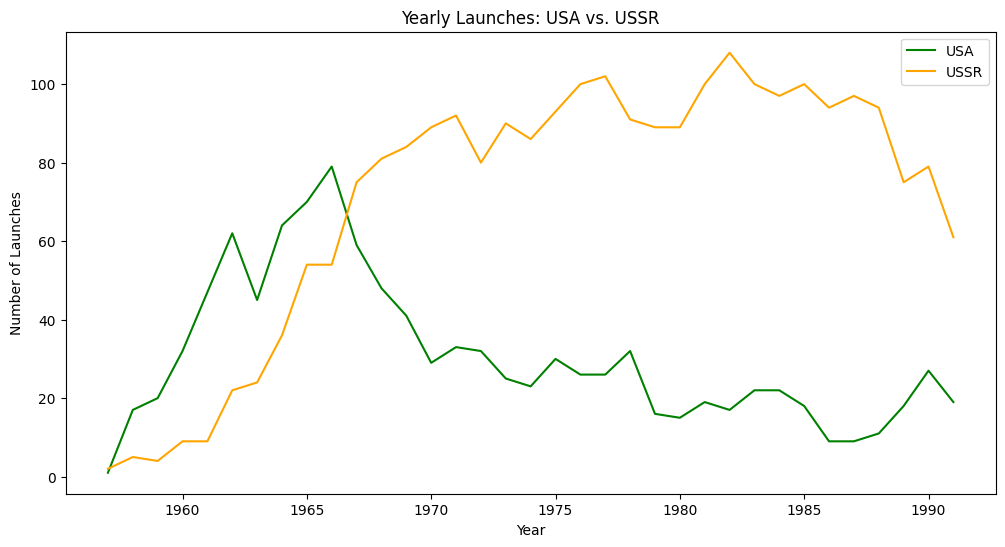

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(launches_by_year.index, launches_by_year['USA'],label='USA',color='green')
plt.plot(launches_by_year.index, launches_by_year['Russia + Kazakhstan'],label='USSR',color='orange')
plt.title('Yearly Launches: USA vs. USSR')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend()
plt.show()


## Chart the Total Number of Mission Failures Year on Year.

In [81]:
failed_missions = launch_data[launch_data['Mission_Status'] == 'Failure']

In [82]:
failed_launches_by_year = failed_missions.groupby([failed_missions.index.year,'Country Group'])['Mission_Status'].count().unstack().fillna(0)

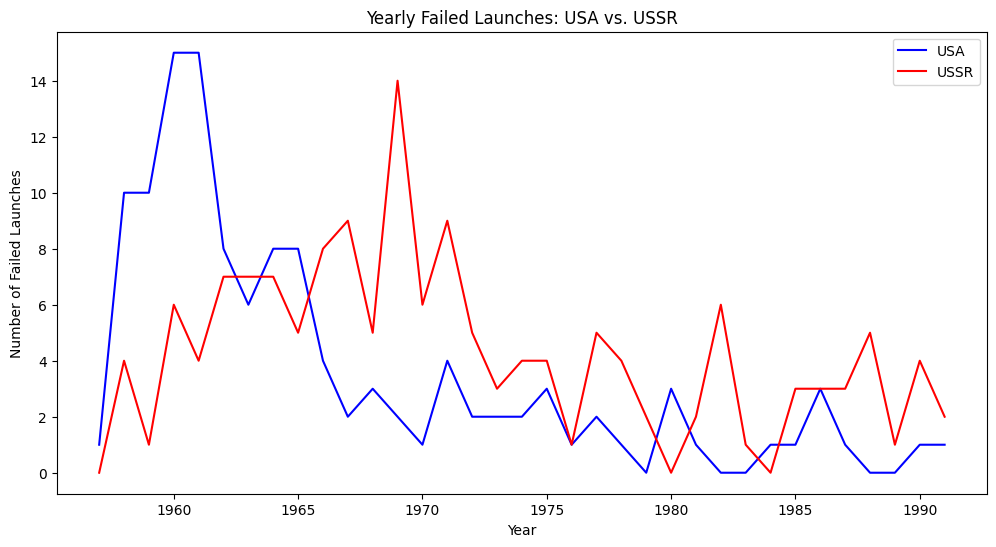

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(failed_launches_by_year.index, failed_launches_by_year['USA'],label='USA',color='blue')
plt.plot(failed_launches_by_year.index, failed_launches_by_year['Russia + Kazakhstan'],label='USSR',color='red')
plt.title('Yearly Failed Launches: USA vs. USSR')
plt.xlabel('Year')
plt.ylabel('Number of Failed Launches')
plt.legend()
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [84]:
failure_percentage = (failed_launches_by_year/ launches_by_year) * 100

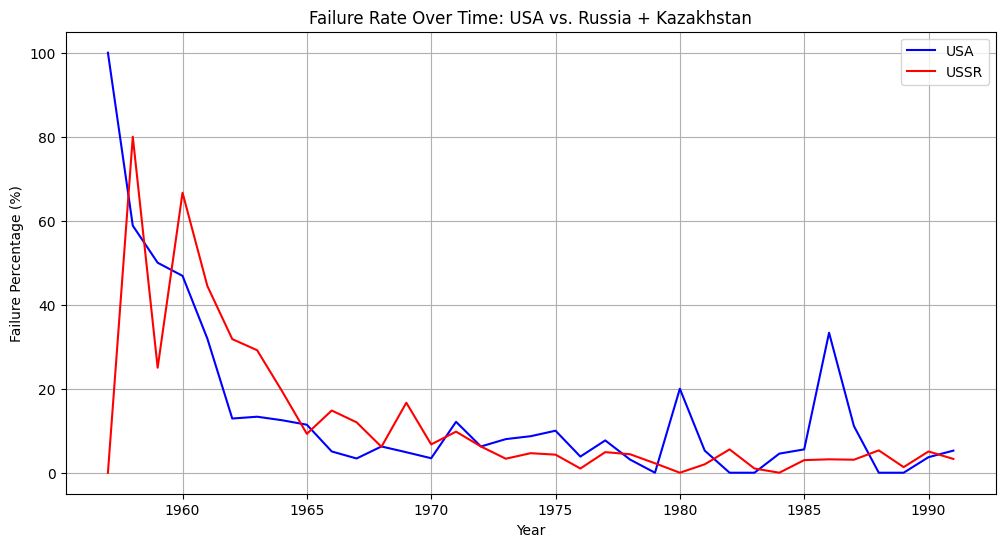

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(failure_percentage.index, failure_percentage['USA'],label='USA',color='blue')
plt.plot(failure_percentage.index, failure_percentage['Russia + Kazakhstan'],label='USSR',color='red')
plt.title('Failure Rate Over Time: USA vs. Russia + Kazakhstan')
plt.xlabel('Year')
plt.ylabel('Failure Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to today

results change if we only look at the number of successful launches

In [86]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data = df_data.set_index('Date')

In [87]:
launches_by_year_country = df_data.groupby([df_data.index.year,'Country Code'])['Mission_Status'].count().unstack().fillna(0)
yearly_leading_country = launches_by_year_country.idxmax(axis=1)

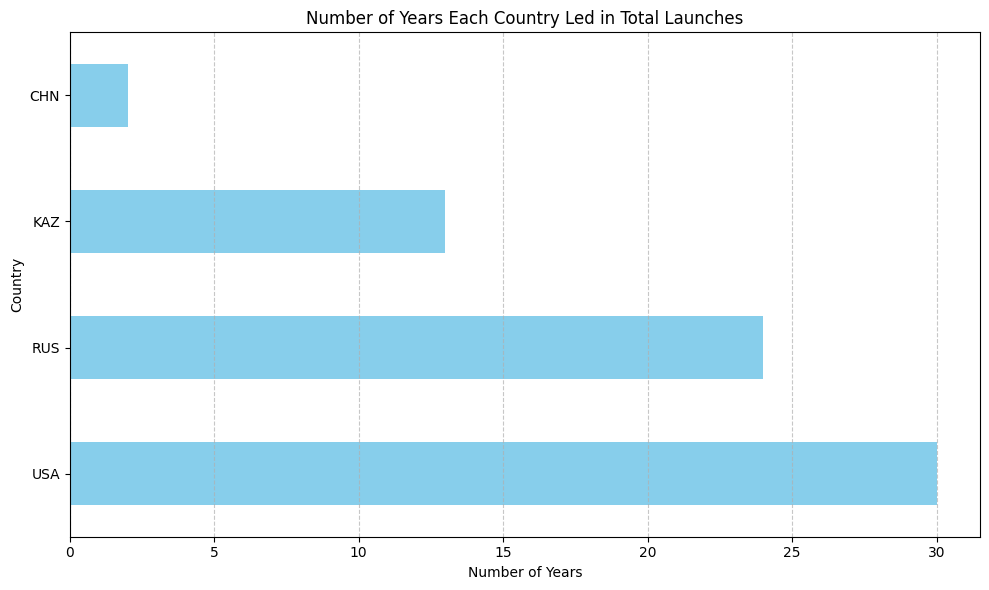

In [88]:
leader_count= yearly_leading_country.value_counts()
plt.figure(figsize=(10, 6))
leader_count.plot(kind='barh', color='skyblue')
plt.title('Number of Years Each Country Led in Total Launches')
plt.xlabel('Number of Years')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [89]:
success_df = df_data[df_data['Mission_Status'] == 'Success']
success_by_year_country = success_df.groupby([success_df.index.year, 'Country Code'])['Mission_Status'].count().unstack(fill_value=0)
yearly_leader_success = success_by_year_country.idxmax(axis=1)

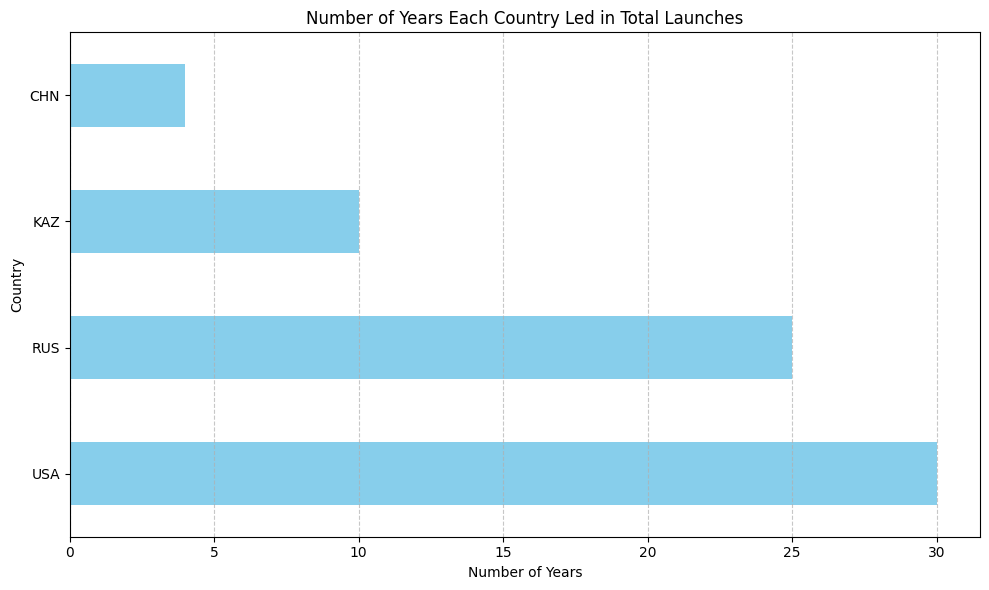

In [90]:
leader_success_count=yearly_leader_success.value_counts()
plt.figure(figsize=(10, 6))
leader_success_count.plot(kind='barh', color='skyblue')
plt.title('Number of Years Each Country Led in Total Launches')
plt.xlabel('Number of Years')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches


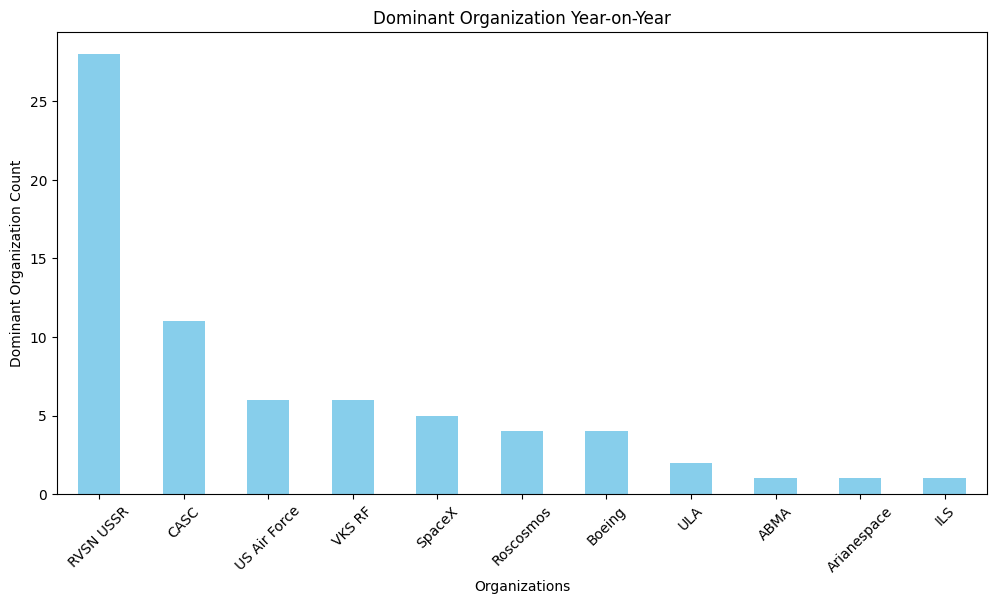

Dominant organizations in the 1970s: RVSN USSR
Dominant organizations in the 1980s: RVSN USSR
Dominant organizations in the 1990s: VKS RF
Dominant organizations in the 2000s: Roscosmos
Dominant in 2020: CASC
Dominant in 2022: SpaceX
Dominant in 2023: SpaceX
Dominant in 2024: SpaceX


In [97]:
launches_by_org_yearly = df_data.groupby([df_data.index.year, 'Organization'])['Mission_Status'].count().unstack(fill_value=0)
dominant_org_per_year = launches_by_org_yearly.idxmax(axis=1)

plt.figure(figsize=(12, 6))
dominant_org_per_year.value_counts().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Dominant Organization Year-on-Year')
plt.xlabel('Organizations')
plt.ylabel('Dominant Organization Count')
plt.xticks(rotation=45)
plt.show()

print("Dominant organizations in the 1970s:", dominant_org_per_year.loc[1970:1979].mode()[0])
print("Dominant organizations in the 1980s:", dominant_org_per_year.loc[1980:1989].mode()[0])
print("Dominant organizations in the 1990s:", dominant_org_per_year.loc[1990:1999].mode()[0])
print("Dominant organizations in the 2000s:", dominant_org_per_year.loc[2000:2009].mode()[0])
print("Dominant in 2020:", dominant_org_per_year.loc[2020])
print("Dominant in 2022:", dominant_org_per_year.loc[2022])
print("Dominant in 2023:", dominant_org_per_year.loc[2023])
print("Dominant in 2024:", dominant_org_per_year.loc[2024])
# print("Dominant organizations in from last couple years:", dominant_org_per_year.loc[2018:2024].mode()[0])


In [99]:
dominant_org_per_year

,0
Date,
"1,957.00",RVSN USSR
"1,958.00",ABMA
"1,959.00",US Air Force
"1,960.00",US Air Force
"1,961.00",US Air Force
...,...
"2,021.00",CASC
"2,022.00",SpaceX
"2,023.00",SpaceX


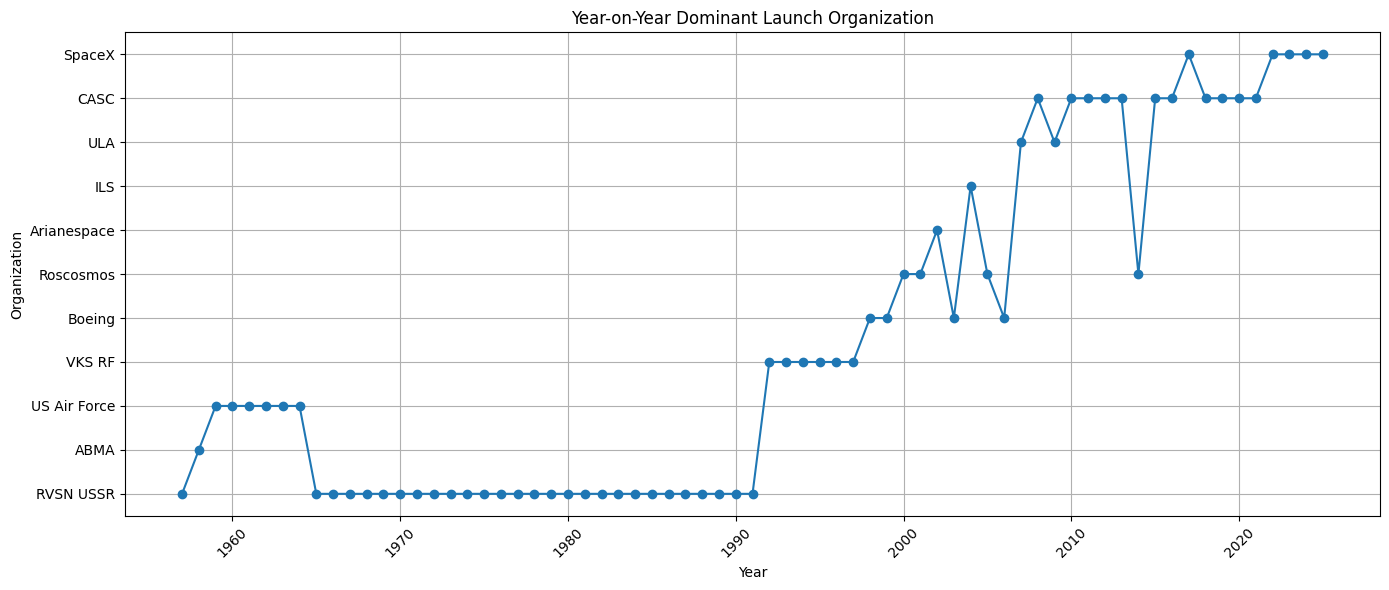

In [98]:
plt.figure(figsize=(14, 6))
plt.plot(dominant_org_per_year.index, dominant_org_per_year.values, marker='o', linestyle='-')
plt.title("Year-on-Year Dominant Launch Organization")
plt.xlabel("Year")
plt.ylabel("Organization")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()